In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph , END , START

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages ## this is called reducer


In [2]:
class State(TypedDict):
    messages: Annotated[list, add_messages] 
    ## Annotated anotate the messages into human and ai messages Add_Message basically prepare the whole list of messages of previous conversation to maintain the context of MessageHistory
    

In [ ]:
from dotenv import load_dotenv
import os
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')


In [7]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="llama3-70b-8192")
llm2 = ChatGroq(model = 'qwen-2.5-32b')

In [10]:
llm.invoke("What is langGraph")

AIMessage(content="LangGraph is an open-source graph-based language model that represents language as a graph structure, where nodes represent words or entities, and edges represent relationships between them. This approach deviates from traditional language models that rely on sequential or hierarchical representations of language.\n\nIn LangGraph, each node in the graph is associated with a set of features, such as word embeddings, part-of-speech tags, and semantic roles. The edges between nodes capture various relationships, including:\n\n1. **Syntactic relationships**: subject-verb-object relationships, modifier relationships, and dependency parse trees.\n2. **Semantic relationships**: entity co-occurrence, coreference, and semantic role labeling.\n3. **Pragmatic relationships**: discourse relationships, such as coreference, bridging, and event coreference.\n\nBy representing language as a graph, LangGraph can capture complex relationships between words and entities, and model lang

In [11]:
def superbot(state:State):
    return {"messages" : [llm.invoke(state['messages'])]}

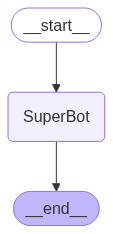

In [16]:
from IPython.display import Image , display
graph = StateGraph(State)
graph.add_node("SuperBot" , superbot)

### ADD Edges

graph.add_edge(START , "SuperBot")
graph.add_edge("SuperBot" , END)

graph_builder = graph.compile()

### Display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [18]:
#### Invocation 

response = graph_builder.invoke({"messages" : "Hi my name is Shahbaz And i Like FootBall"})

In [21]:
response.get('messages')[1].content

"Hi Shahbaz! Nice to meet you!\n\nAh, you like football, huh? That's awesome! Which team do you support? Are you a fan of the Premier League, La Liga, or maybe the Champions League?\n\nDo you have a favorite player or a favorite match that you'll never forget?"

In [26]:
for event in graph_builder.stream({"messages" : "Do you know about Romania"} ,stream_mode= "updates"):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Romania! A beautiful country located in Southeastern Europe, known for its rich history, stunning landscapes, and vibrant culture. Here are some interesting facts about Romania:\n\n**History**\n\n* Romania has a complex and tumultuous history, with various empires and dynasties ruling over the territory, including the Romans, Ottomans, Habsburgs, and Soviets.\n* The country has a strong medieval heritage, with many well-preserved castles, fortresses, and monasteries, such as Bran Castle (also known as Dracula's Castle) and the Voronet Monastery.\n* Romania was a key player in World War I and II, and suffered greatly during the communist era under Nicolae Ceaușescu's regime.\n\n**Landscapes and Nature**\n\n* Romania is home to the Carpathian Mountains, which offer great opportunities for hiking, skiing, and wildlife spotting.\n* The Danube River forms the border with Bulgaria and Serbia, and the Danube Delta is a UNESCO World Heritage Site a